In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Parameters

In [3]:
name = "GoogleNet"
k_folds = 10
epochs = 10

## MatLab Data Loading

In [5]:
class k_group:
    def __init__(self, training_data, validation_data):
        entry_count = training_data.shape[0]

        self.acc_train = np.empty([entry_count])
        self.loss_train = np.empty([entry_count])
    
        for i in range(0, entry_count):
            self.acc_train[i] = training_data[i][4]
            self.loss_train[i] = training_data[i][3]

        self.acc_val = np.empty([entry_count])
        self.loss_val = np.empty([entry_count])

        for i in range(0, entry_count):
            self.acc_val[i] = validation_data[i][2]
            self.loss_val[i] = validation_data[i][1]
        

In [7]:
path = "CNN/" + name + "/MathLab_Data"
k_groups = []

for i in range(0, k_folds):
    training_data = np.genfromtxt(path + "/training/trainK" + str(i + 1) + ".csv", delimiter=",")[1:]
    validation_data = np.genfromtxt(path + "/validation/valK" + str(i + 1) + ".csv", delimiter=",")[1:]

    k_groups.append(k_group(training_data, validation_data))

## Find best k group and average accuracy

In [9]:
best_k = 0
avg_epoch = 0
last_avg_epoch = 0
avg_epoch_sum = 0

for i in range(0, k_folds):
    k = 0
    epoch_acc = np.empty([epochs])
    for j in range (44, epochs * 45, 45):
        epoch_acc[k] = k_groups[i].acc_train[j]
        k += 1

    avg_epoch =  np.mean(epoch_acc)
        
    if avg_epoch > last_avg_epoch:
        last_avg_epoch = avg_epoch
        best_k = i

    avg_epoch_sum += avg_epoch

print("Average epoch accuracy across {} groups : {:.2f} %".format(k_folds, avg_epoch_sum / k_folds))
print("Best k group : {} with average epoch accuracy {:.2f} %".format(best_k + 1, last_avg_epoch))

Average epoch accuracy across 10 groups : 99.70 %
Best k group : 3 with average epoch accuracy 100.00 %


## Graphing

### Accuracy

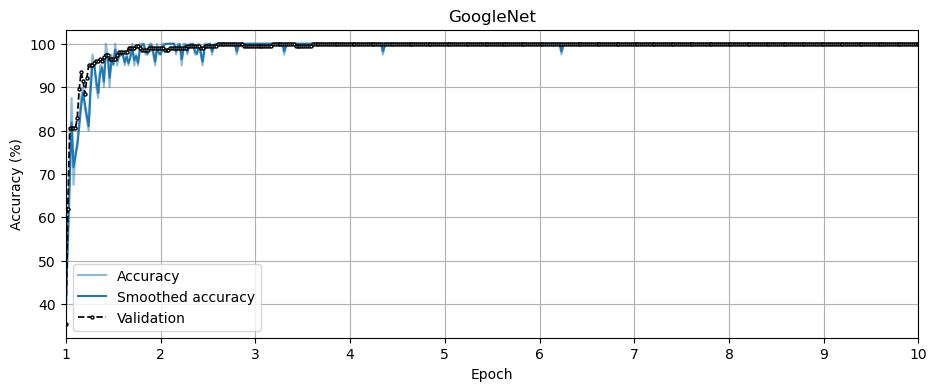

In [11]:
color = "#1f77b4"
labels = ["Accuracy", "Smoothed accuracy", "Validation"]

train_y = k_groups[best_k].acc_train
train_x = np.linspace(1, 10, 450)

val_y = k_groups[best_k].acc_val
val_x = np.linspace(1, 10, 450)

#Creating smoothed data
dataframe = pd.DataFrame(train_y)
smoothed_data = dataframe.ewm(com=0.4).mean()

fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(train_x, train_y,alpha=0.5, color=color)
ax.plot(train_x, smoothed_data, color=color)
ax.plot(val_x, val_y, "ko--", markersize=2.15,  markerfacecolor='w', linewidth=1.25)

ax.grid(True, which="both")
ax.legend(labels)

plt.ylabel(labels[0] + " (%)")
plt.xlabel("Epoch")

plt.xlim(1, 10)

plt.title(name)
plt.savefig("CNN/" + name + "/" + name + "_TrainGraphAcc.svg")

### Loss

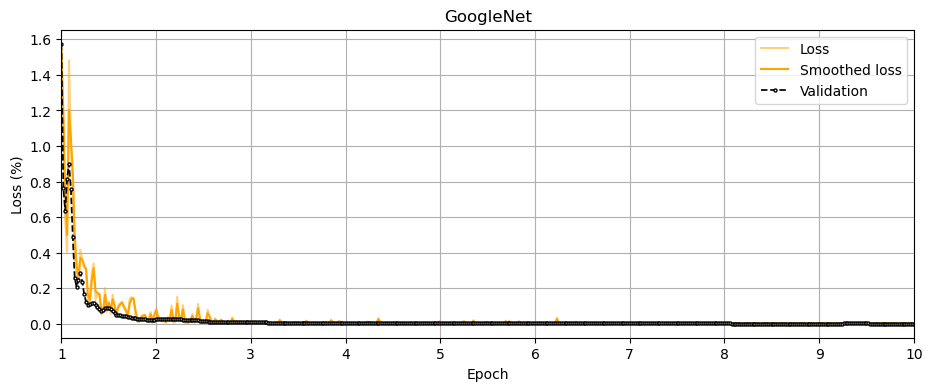

In [13]:
color = "#FFA500"
labels = ["Loss", "Smoothed loss", "Validation"]

train_y = k_groups[best_k].loss_train
train_x = np.linspace(1, 10, 450)

val_y = k_groups[best_k].loss_val
val_x = np.linspace(1, 10, 450)

#Creating smoothed data
dataframe = pd.DataFrame(train_y)
smoothed_data = dataframe.ewm(com=0.4).mean()

fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(train_x, train_y,alpha=0.5, color=color)
ax.plot(train_x, smoothed_data, color=color)
ax.plot(val_x, val_y, "ko--", markersize=2.15,  markerfacecolor='w', linewidth=1.25)

ax.grid(True, which="both")
ax.legend(labels)

plt.ylabel(labels[0] + " (%)")
plt.xlabel("Epoch")

plt.xlim(1, 10)

plt.title(name)
plt.savefig("CNN/" + name + "/" + name + "_TrainGraphLoss.svg")

## Confusion matrix

### Loading data

In [15]:
final_path = "CNN/" + name + "/MathLab_Data/final_test_results"

y_pred_raw = np.genfromtxt(final_path + "/y_predicted.csv", delimiter=",", dtype="S")[1:]
y_test_raw = np.genfromtxt(final_path + "/y_test.csv", delimiter=",", dtype="S")[1:]

y_pred = np.empty(len(y_pred_raw))
y_test = np.empty(len(y_test_raw))

for i in range(0, len(y_pred_raw)):
    if y_pred_raw[i] == b'Edible':
        y_pred[i] = 0
    else:
        y_pred[i] = 1

    if y_test_raw[i] == b'Edible':
        y_test[i] = 0
    else:
        y_test[i] = 1

### Matrix visualization

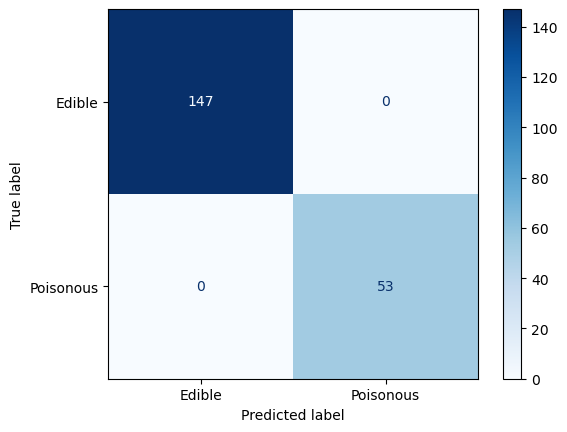

In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap=plt.cm.Blues).figure_.savefig("CNN/" + name + "/" + name + "_ConfusionMatrix.svg")

## Metrics

In [19]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

accuracy = (tp + tn) / (tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (precision *  recall) / (precision + recall)
f1 *= 2

print(name + ":")
print("Accuracy  {:0.2f} %".format(accuracy * 100))
print("Precision {:0.2f} %".format(precision * 100))
print("Recall    {:0.2f} %".format(recall * 100))
print("F1        {:0.2f} %".format(f1 * 100))

GoogleNet:
Accuracy  100.00 %
Precision 100.00 %
Recall    100.00 %
F1        100.00 %
